In [869]:
%load_ext autoreload
%autoreload 2
%aimport -decode_fish.engine.place_psfs

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [870]:
from decode_fish.imports import *
from decode_fish.funcs.file_io import *
from decode_fish.funcs.emitter_io import *
from decode_fish.funcs.utils import *
from decode_fish.funcs.dataset import *
from decode_fish.funcs.plotting import *
from decode_fish.engine.noise import estimate_noise_scale
import shutil
from decode_fish.funcs.visualization import *

from numba import njit
from scipy.spatial import cKDTree
from decode_fish.funcs.evaluation import *

import io, requests, glob

from decode_fish.funcs.merfish_eval import *
from decode_fish.funcs.exp_specific import *
# from starfish import data
import pprint
import seaborn as sns

import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook'

In [871]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'

In [872]:
bench_df = get_mop_benchmark()
codebook, targets = get_mop_codebook()
artifact_coords = pd.read_csv('/groups/turaga/home/speisera/Mackebox/Artur/WorkDB/deepstorm//datasets/CodFish/MERFISH/MOp/mouse1_sample1_raw/artifact_coords.csv')

17130008


In [873]:
select = ['base']#,'bs:20xcrop_sz:56xbl_loss_scale:0.003','crop_sz:56','bs:15','bs:20']

sweep_name = 'sweep_mop_32'
file_nrs = [150,151,47]
scale_train = True

model_dir = f'/groups/turaga/home/speisera/Mackebox/Artur/WorkDB/deepstorm/models/fishcod/MERFISH_MOp/{sweep_name}/*'
out_dir = f'/groups/turaga/home/speisera/Mackebox/Artur/WorkDB/deepstorm/decode_fish/data/results/MERFISH/{sweep_name}/'
Path(out_dir).mkdir(exist_ok=True)

files = glob.glob(model_dir)
base_str = 'bsub -gpu "num=1" -q gpu_rtx -n 3 -o logs/ofish.log -e logs/efish.log /groups/turaga/home/speisera/anaconda3/envs/decode_fish_dev2/bin/python /groups/turaga/home/speisera/Mackebox/Artur/WorkDB/deepstorm/decode_fish/decode_fish/merfish_eval.py '

with open('run_slurm.sh', 'w') as f:
    for nr in file_nrs:
        for n in files:
            if 'z' not in n:
                name = n.split('/')[-1]
                if 'step' not in name:
                    print(name)
                    f.write(base_str + f'run_name={name} sweep_name={sweep_name}  file_nr={nr} scale_train={scale_train} \n')
                    print(base_str + f'run_name={name} sweep_name={sweep_name} file_nr={nr} scale_train={scale_train} \n')

target_mean:Trueximage_path:scaled4_images47.tif
bsub -gpu "num=1" -q gpu_rtx -n 3 -o logs/ofish.log -e logs/efish.log /groups/turaga/home/speisera/anaconda3/envs/decode_fish_dev2/bin/python /groups/turaga/home/speisera/Mackebox/Artur/WorkDB/deepstorm/decode_fish/decode_fish/merfish_eval.py run_name=target_mean:Trueximage_path:scaled4_images47.tif sweep_name=sweep_mop_32 file_nr=150 scale_train=True 

target_mean:Trueximage_path:scaled4_images150.tif
bsub -gpu "num=1" -q gpu_rtx -n 3 -o logs/ofish.log -e logs/efish.log /groups/turaga/home/speisera/anaconda3/envs/decode_fish_dev2/bin/python /groups/turaga/home/speisera/Mackebox/Artur/WorkDB/deepstorm/decode_fish/decode_fish/merfish_eval.py run_name=target_mean:Trueximage_path:scaled4_images150.tif sweep_name=sweep_mop_32 file_nr=150 scale_train=True 

target_mean:Trueximage_path:scaled4_images151.tif
bsub -gpu "num=1" -q gpu_rtx -n 3 -o logs/ofish.log -e logs/efish.log /groups/turaga/home/speisera/anaconda3/envs/decode_fish_dev2/bin/pyt

In [887]:
istd_dfs = {}
bench_dfs = {}
for fnr in file_nrs:
    istd_dfs[str(fnr)] = clean_istd_df(pd.read_csv(f'../data/results/MERFISH/MOp_istdeco/sweep_mop_32_norm_{fnr}.csv'), fids=artifact_coords)
    bench_dfs[str(fnr)] = clean_bench_df(get_mop_fov(bench_df, fnr), artifact_coords)

In [876]:
df_dict = {'150':{},'151':{},'47':{}}

sweep_name = 'merfish_sweep_mop_32'

for f in glob.glob(f'../data/results/MERFISH/{sweep_name}_*.csv'):
    if '' in f:
        dec_df = pd.read_csv(f)
        
        if len(dec_df) > 1000:

            if '_47' in f:
                ds = '47'
            if '_150' in f:
                ds = '150'
            if '_151' in f:
                ds = '151'

#             dec_df = remove_doublets(dec_df, tolerance=200)
#             inp = input_from_df(dec_df, codebook)
#             dec_df['net_score'] = cpu(net(inp))
#             inp[:,:27] *= 0
#             dec_df['net_score2'] = cpu(net(inp))
#             dec_df = sel_int_ch(dec_df, codebook)

            sel = dec_df['code_inds']<len(codebook)
            print(f, sum(sel), len(dec_df)/sum(sel))
            dec_df = dec_df[sel]
            dec_df['gene'] = 'single'
            dec_df.loc[sel,'gene'] = targets[dec_df.loc[sel,'code_inds']]
#             dec_df = log_reg(dec_df, logr_coefs)
            dec_df['class'] = dec_df['gene'].str.contains('Blank').values * 1 
#             dec_df.loc[~sel,'class'] = 2
            
#             dec_df['net_score'] = cpu(tra(input_from_df(dec_df)))
            df_dict[ds][f.split(sweep_name)[-1].split('.csv')[0].split('_None_')[0][1:]] = dec_df

../data/results/MERFISH/merfish_sweep_mop_32_target_mean:Trueximage_path:scaled4_images150.tif_None_47.csv 101856 1.4531004555450833
../data/results/MERFISH/merfish_sweep_mop_32_target_mean:Trueximage_path:scaled4_images151.tif_None_47.csv 102622 1.442556177038062
../data/results/MERFISH/merfish_sweep_mop_32_target_mean:Trueximage_path:scaled4_images151.tif_None_150.csv 51395 2.1651522521646074
../data/results/MERFISH/merfish_sweep_mop_32_target_mean:Trueximage_path:scaled4_images150.tif_None_151.csv 61619 1.9728655122608287
../data/results/MERFISH/merfish_sweep_mop_32_z_facs:Falsexnorm:none_None_150.csv 48876 2.164948031753826
../data/results/MERFISH/merfish_sweep_mop_32_z_facs:Falsexnorm:none_None_151.csv 61580 1.9327541409548554
../data/results/MERFISH/merfish_sweep_mop_32_z_facs:Falsexnorm:none_None_47.csv 106061 1.477885367854348
../data/results/MERFISH/merfish_sweep_mop_32_target_mean:Trueximage_path:scaled4_images151.tif_None_151.csv 65899 1.9407274768964629
../data/results/MERF

In [880]:
int_arr = exp_df.nsmallest(omega_df.loc['N', n]['bench'],'int_ratio')[[f'int_{i}' for i in range(codebook.shape[1])]].values

TypeError: 'float' object cannot be interpreted as an integer

In [916]:
names = [k for k in df_dict['151'].keys()]

omega_df = DF(columns=pd.MultiIndex.from_product([['150','151','47'], names+['bench','istdeco']]), index=['N','N_blanks', 'NN_blanks', 'int_sig'])
for fnr in ['150','151','47']:
    omega_df.loc['N', fnr]['bench'] = len(bench_dfs[fnr])
    omega_df.loc['N_blanks', fnr]['bench'] = sum(bench_dfs[fnr]['gene'].str.contains('Blank'))
    omega_df.loc['NN_blanks', fnr]['bench'] = 1.
    
    omega_df.loc['N_blanks', fnr]['istdeco'] = sum(istd_dfs[fnr].nlargest(omega_df.loc['N', fnr]['bench'], 'quality')['gene'].str.contains('Blank'))
    omega_df.loc['NN_blanks', fnr]['istdeco'] = sum(istd_dfs[fnr].nlargest(omega_df.loc['N', fnr]['bench'], 'quality')['gene'].str.contains('Blank'))/omega_df.loc['N_blanks', fnr]['bench']

for n in ['150','151','47']:
    for j in names:
        exp_df = df_dict[n][j]
        exp_df = zero_int_ch(exp_df, codebook)
        int_arr = exp_df.nsmallest(omega_df.loc['N', n]['bench'],'int_ratio')[[f'int_{i}' for i in range(codebook.shape[1])]].values

        ch_means = [int_arr[:,i].sum()/(int_arr[:,i] != 0).sum() for i in range(22)]
        omega_df.loc['int_sig', n][j] = np.sqrt(np.var(ch_means))
#             omega_df.loc['int_sig', n][j] = int_arr[int_arr.nonzero()].mean()

        exp_df = log_reg(exp_df, logr_coefs)

        omega_df.loc['N', n][j] = len(exp_df)
        omega_df.loc['N_blanks', n][j] = sum(exp_df['gene'].str.contains('Blank'))
        if len(exp_df) > omega_df.loc['N', n]['bench']:
            omega_df.loc['NN_blanks', n][j] = sum(exp_df.nsmallest(omega_df.loc['N', n]['bench'], 'int_ratio')['gene'].str.contains('Blank'))/omega_df.loc['N_blanks', n]['bench']
        else:
            omega_df.loc['NN_blanks', n][j] = None

In [917]:
omega_df

150  \
          target_mean:Trueximage_path:scaled4_images150.tif   
N                                                     55752   
N_blanks                                                484   
NN_blanks                                               0.4   
int_sig                                            0.149683   

                                  \
          z_facs:Falsexnorm:none   
N                          48876   
N_blanks                     339   
NN_blanks               0.244444   
int_sig                 0.230122   

                                                             \
          target_mean:Trueximage_path:scaled4_images151.tif   
N                                                     51395   
N_blanks                                                465   
NN_blanks                                          0.311111   
int_sig                                            0.152019   

                                                                             \
          target_mean:Trueximage_path:scaled4_images47.tif  bench   istdeco   
N                                                    52971  28680       NaN   
N_blanks                                               438     45        29   
NN_blanks                                              0.2    1.0  0.644444   
int_sig                                           0.168185    NaN       NaN   

                                                        151  \
          target_mean:Trueximage_path:scaled4_images150.tif   
N                                                     61619   
N_blanks                                                464   
NN_blanks                                          0.263158   
int_sig                                            0.160447   

                                  \
          z_facs:Falsexnorm:none   
N                          61580   
N_blanks                     475   
NN_blanks               0.210526   
int_sig                 0.164243   

                                                             \
          target_mean:Trueximage_path:scaled4_images151.tif   
N                                                     65899   
N_blanks                                                628   
NN_blanks                                          0.192982   
int_sig                                            0.115861   

                                                                             \
          target_mean:Trueximage_path:scaled4_images47.tif  bench   istdeco   
N                                                    63093  36480       NaN   
N_blanks                                               521     57        27   
NN_blanks                                         0.122807    1.0  0.473684   
int_sig                                           0.167265    NaN       NaN   

                                                         47  \
          target_mean:Trueximage_path:scaled4_images150.tif   
N                                                    101856   
N_blanks                                                662   
NN_blanks                                          0.238636   
int_sig                                             0.12724   

                                  \
          z_facs:Falsexnorm:none   
N                         106061   
N_blanks                     684   
NN_blanks               0.295455   
int_sig                  0.09704   

                                                             \
          target_mean:Trueximage_path:scaled4_images151.tif   
N                                                    102622   
N_blanks                                                785   
NN_blanks                                          0.227273   
int_sig                                            0.137894   

                                                                             
          target_mean:Trueximage_path:scaled4_images47.tif  bench   istdeco  
N                        

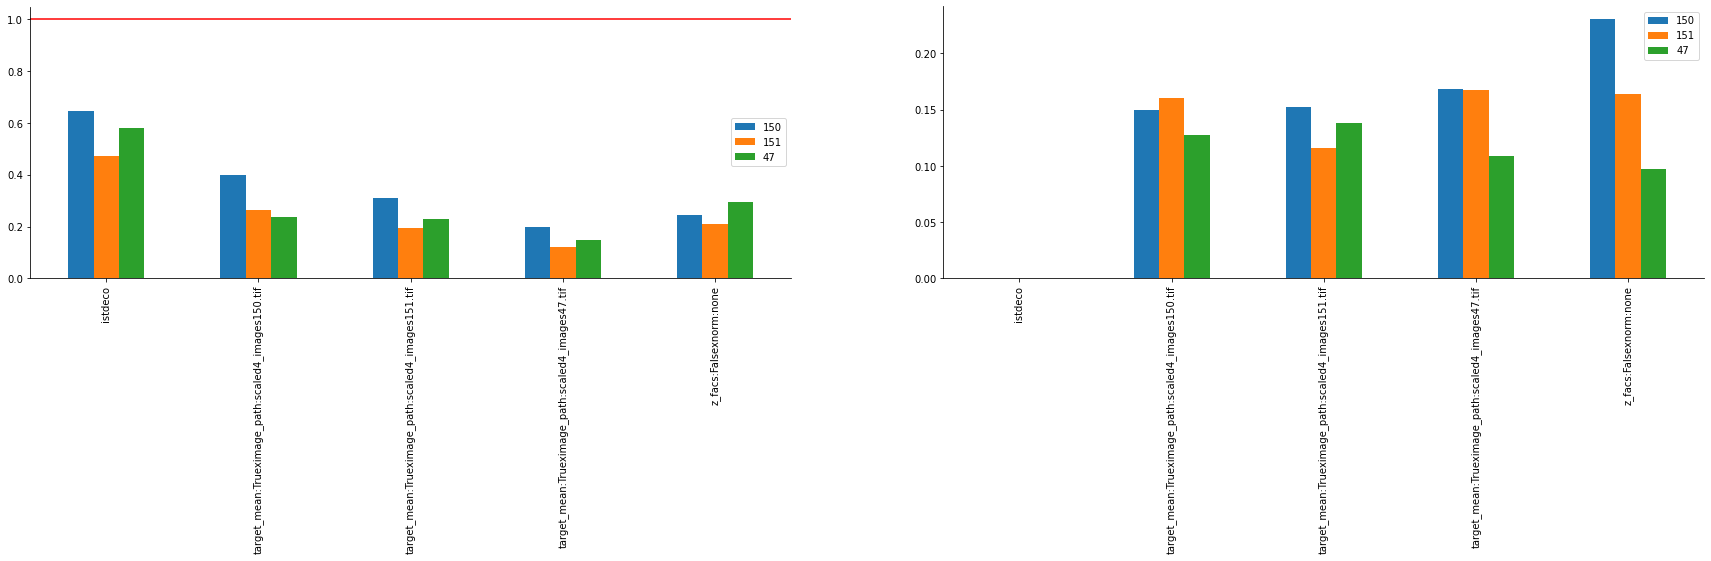

In [918]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30,5))
plot_df = omega_df.loc['NN_blanks'].unstack().T.astype(np.float32).drop('bench')
plot_df.plot.bar(ax=axes[0],stacked=False)
axes[0].plot([-0.5,len(omega_df.columns)/2],[1,1], color='red')
plot_df = omega_df.loc['int_sig'].unstack().T.astype(np.float32).drop('bench')
plot_df.plot.bar(ax=axes[1],stacked=False)
sns.despine()

In [630]:
res_df1 = df_dict['47']['base_2S_phasing']
# res_df2 = df_dict['150']['_lr:0.0002xpos_noise_xy:0.3']
# res_df2r = df_dictr['151']['_seed:1xnorm:nonexmodel_init:nullxmean_diff:True']

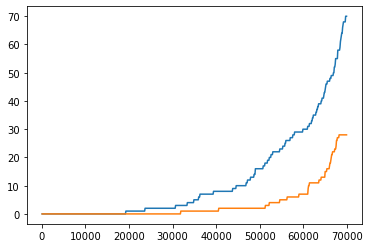

In [633]:
res_df1['class'] = res_df1['gene'].str.contains('Blank')
# res_df1 = sel_int_ch(res_df1, codebook)
for k in ['comb_sig','int_ratio']:
    r  = make_roc(res_df1, k, n_max=70000, ascending=True)
    plt.plot(r[0],r[1], label=k)
    
# res_df2['class'] = res_df2['gene'].str.contains('Blank')
# res_df2 = sel_int_ch(res_df2, codebook)
# for k in ['comb_sig','score','int_ratio']:
#     r  = make_roc(res_df2, k, n_max=70000, ascending=True)
#     plt.plot(r[0],r[1], label=k)
# plt.legend()

63950 64000


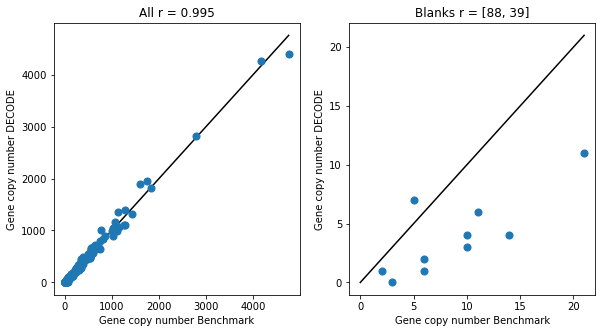

In [638]:
plot_gene_panels(res_df1.nsmallest(64000, 'comb_sig'), bench_47, targets)

63950 64000


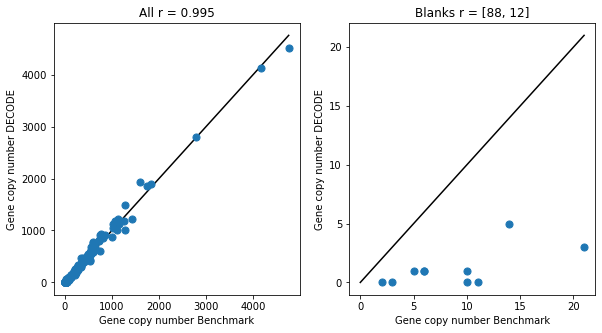

In [641]:
plot_gene_panels(res_df1.nsmallest(64000, 'int_ratio'), bench_47, targets)

In [320]:
_,matches,shift = matching(bench_150, res_df1.nsmallest(29000, 'comb_sig'), tolerance=500, print_res=True, allow_multiple_matches=False)

Recall: 0.717
Precision: 0.708
Jaccard: 55.318
RMSE_vol: 78.489
Eff_3d: 40.531
FN: 8120.0 FP: 8466.0
Num. matches: 20534.000
Shift: 0.51,3.08,-42.18


In [254]:
_,matches,shift = matching(bench_150, res_df2.nsmallest(29000, 'comb_sig'), tolerance=500, print_res=True, allow_multiple_matches=False)

Recall: 0.663
Precision: 0.655
Jaccard: 49.166
RMSE_vol: 64.478
Eff_3d: 39.805
FN: 9651.0 FP: 9997.0
Num. matches: 19003.000
Shift: 0.34,0.27,-3.82


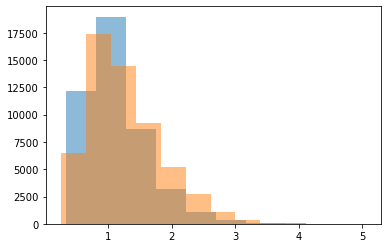

In [272]:
_ =plt.hist(res_df1['int_ratio'], alpha=0.5)
_ =plt.hist(res_df2['int_ratio'], alpha=0.5)

In [851]:
_,matches,shift = matching(istd_151.nlargest(50000, 'quality'), res_df.nsmallest(50000, 'score'), tolerance=500, print_res=True, allow_multiple_matches=False)

Recall: 0.002
Precision: 0.002
Jaccard: 0.109
RMSE_vol: 352.061
Eff_3d: -102.398
FN: 49891.0 FP: 49891.0
Num. matches: 109.000
Shift: -1.41,-14.39,1.20


In [253]:
_,matches,shift = matching(res_df1, res_df2, tolerance=500, print_res=True, allow_multiple_matches=False)

Recall: 0.754
Precision: 0.817
Jaccard: 64.495
RMSE_vol: 38.462
Eff_3d: 59.621
FN: 25547.0 FP: 17476.0
Num. matches: 78150.000
Shift: -0.23,0.24,1.87


In [256]:
matches.keys()

Index(['loc_idx_tar', 'frame_idx_tar', 'code_inds_tar', 'x_tar', 'y_tar',
       'z_tar', 'prob_tar', 'x_sig_tar', 'y_sig_tar', 'z_sig_tar',
       ...
       'int_19_pred', 'int_sig_19_pred', 'int_20_pred', 'int_sig_20_pred',
       'int_21_pred', 'int_sig_21_pred', 'gene_pred', 'zm_pred', 'score_pred',
       'class_pred'],
      dtype='object', length=118)

In [215]:
int_ks = [f'int_{i}' for i in range(22)]
intarr1 = matches[[f'int_{i}_tar' for i in range(22)]].values
intarr2 = matches[[f'int_{i}_pred' for i in range(22)]].values

for i in range(50):
    plt.plot(intarr1[i])
    plt.plot(intarr2[i])
    plt.show()
    

KeyError: "None of [Index(['int_0_tar', 'int_1_tar', 'int_2_tar', 'int_3_tar', 'int_4_tar',\n       'int_5_tar', 'int_6_tar', 'int_7_tar', 'int_8_tar', 'int_9_tar',\n       'int_10_tar', 'int_11_tar', 'int_12_tar', 'int_13_tar', 'int_14_tar',\n       'int_15_tar', 'int_16_tar', 'int_17_tar', 'int_18_tar', 'int_19_tar',\n       'int_20_tar', 'int_21_tar'],\n      dtype='object')] are in the [columns]"

0.9141224288357411

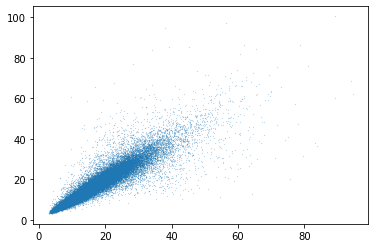

In [1398]:
plt.scatter(matches['x_sig_pred'], matches['x_sig_tar'], s=0.01)
np.corrcoef(np.array(matches['x_sig_pred'], dtype=np.float32), np.array(matches['x_sig_tar'], dtype=np.float32))[0,1]

In [1542]:
res_dfc2 = DF()
for k in res_df2r.columns:
    try:
        res_dfc2[k] = np.array(matches[k+'_pred'].values, dtype=np.float32)
    except ValueError:
        res_dfc2[k] = np.array(matches[k+'_pred'].values)

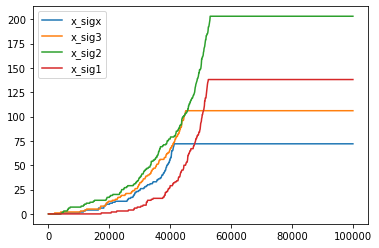

In [1543]:
for k in ['x_sig']:
    r  = make_roc(res_dfc2, k, n_max=100000, ascending=True)
    plt.plot(r[0],r[1], label=k+'x')
    r  = make_roc(res_df2r, k, n_max=100000, ascending=True)
    plt.plot(r[0],r[1], label=k+'3')
    r  = make_roc(res_df2, k, n_max=100000, ascending=True)
    plt.plot(r[0],r[1], label=k+'2')
    r  = make_roc(res_df1, k, n_max=100000, ascending=True)
    plt.plot(r[0],r[1], label=k+'1')
plt.legend()

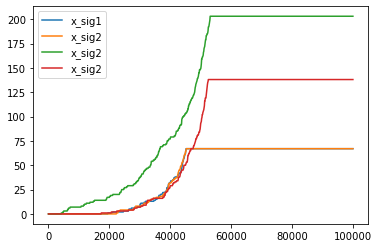

In [1401]:
for k in ['x_sig']:
    r  = make_roc(res_dfc1, k, n_max=100000, ascending=True)
    plt.plot(r[0],r[1], label=k+'1')
    r  = make_roc(res_dfc2, k, n_max=100000, ascending=True)
    plt.plot(r[0],r[1], label=k+'2')
    r  = make_roc(res_df2, k, n_max=100000, ascending=True)
    plt.plot(r[0],r[1], label=k+'2')
    r  = make_roc(res_df1, k, n_max=100000, ascending=True)
    plt.plot(r[0],r[1], label=k+'2')
plt.legend()

In [1402]:
fp1 = res_df1.loc[~res_df1['loc_idx'].isin(matches['loc_idx_tar'])]
fp2 = res_df2.loc[~res_df2['loc_idx'].isin(matches['loc_idx_pred'])]

In [1403]:
print(fp1['gene'].str.contains('Blank').sum())
print(fp2['gene'].str.contains('Blank').sum())

71
136


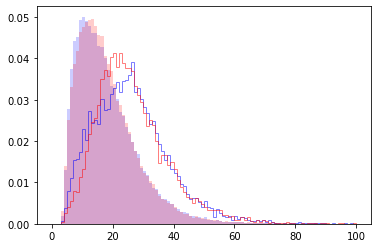

In [1404]:
_ =plt.hist(fp1['x_sig'], alpha=0.5, bins = np.linspace(0,100,101), histtype='step', color='blue', density=True)
_ =plt.hist(res_df1['x_sig'], alpha=0.2, bins = np.linspace(0,100,101), color='blue', density=True)
_ =plt.hist(fp2['x_sig'], alpha=0.5, bins = np.linspace(0,100,101), histtype='step', color='red', density=True)
_ =plt.hist(res_df2['x_sig'], alpha=0.2, bins = np.linspace(0,100,101), color='red', density=True)

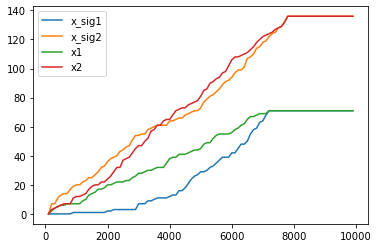

In [1405]:
for k in ['x_sig', 'x']:
    r  = make_roc(fp1, k, n_max=10000, ascending=True)
    plt.plot(r[0],r[1], label=k+'1')
    r  = make_roc(fp2, k, n_max=10000, ascending=True)
    plt.plot(r[0],r[1], label=k+'2')
plt.legend()

In [1406]:
imgvol = cpu(read_MOp_tiff(base_path+'/datasets/CodFish/MERFISH/MOp/mouse1_sample1_raw/aligned_images151.tif', scaled=True, z_to_batch=True)).max(0).max(0)[0]

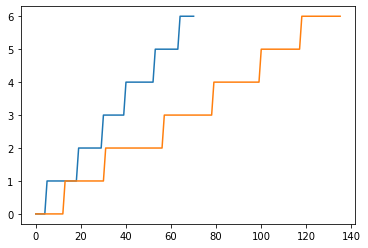

In [1431]:
plt.plot(fp1[fp1['gene'].str.contains('Blank')].nsmallest(200,'frame_idx')['frame_idx'].values)
plt.plot(fp2[fp2['gene'].str.contains('Blank')].nsmallest(200,'frame_idx')['frame_idx'].values)

(1800.0, 1900.0)

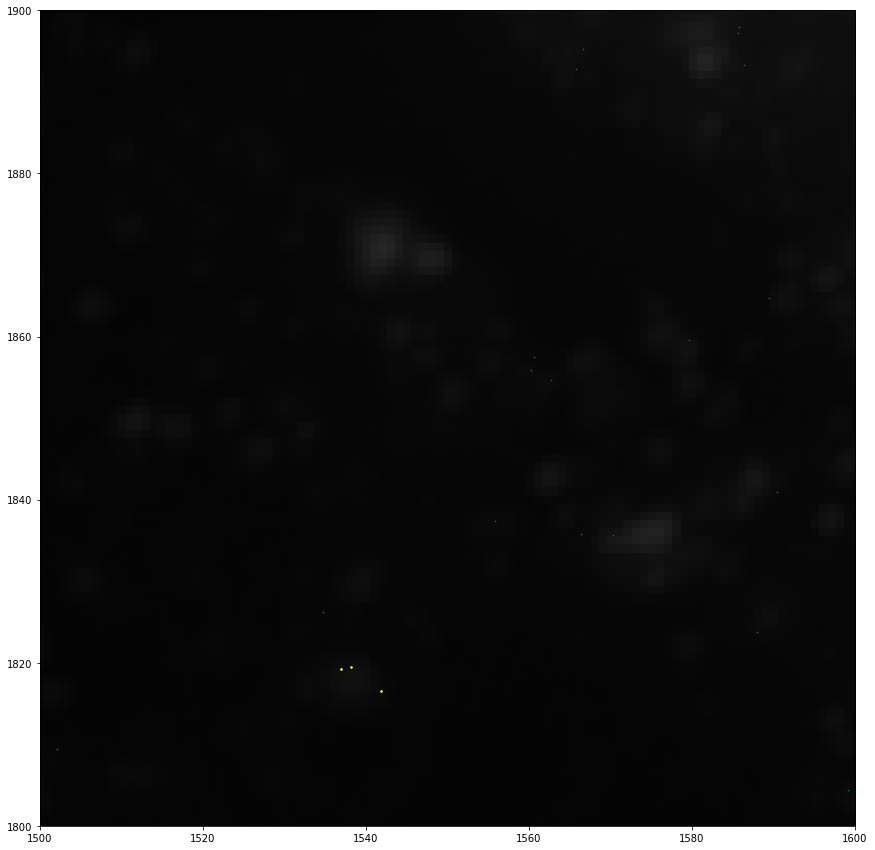

In [1435]:
plt.figure(figsize=(15,15))
plt.imshow(imgvol, cmap='gray')

# plt.scatter(nm_to_px(fp1)['x'], nm_to_px(fp1)['y'], s=0.5, color='red')
plt.scatter(nm_to_px(fp2)['x'], nm_to_px(fp2)['y'], s=0.5, color='green')
                         
plt.scatter(nm_to_px(fp1[fp1['gene'].str.contains('Blank')])['x'], nm_to_px(fp1[fp1['gene'].str.contains('Blank')])['y'], s=2.5, color='pink')
plt.scatter(nm_to_px(fp2[fp2['gene'].str.contains('Blank')])['x'], nm_to_px(fp2[fp2['gene'].str.contains('Blank')])['y'], s=2.5, color='yellow')
plt.xlim(1500,1600)
plt.ylim(1800,1900)

0.6583089515464956

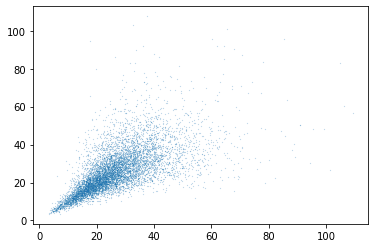

In [1387]:
plt.scatter(fp2['x_sig'], fp2['y_sig'], s=0.01)
np.corrcoef(np.array(fp2['x_sig'], dtype=np.float32), np.array(fp2['y_sig'], dtype=np.float32))[0,1]

In [1385]:
_,tra,shift = matching(fp1, fp2, tolerance=500, print_res=True, match_genes=False)

Recall: 0.138
Precision: 0.126
Jaccard: 7.059
RMSE_vol: 317.488
Eff_3d: -83.950
FN: 6187.0 FP: 6834.0
Num. matches: 989.000
Shift: 22.41,-2.98,-1.74


36405 7176


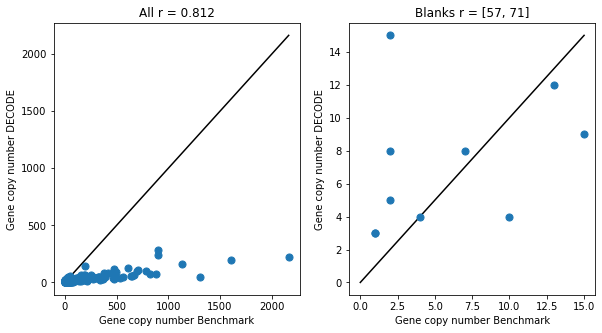

In [1422]:
plot_gene_panels(fp1.nsmallest(36405, 'comb_sig'), bench_151, targets)

64252 36405


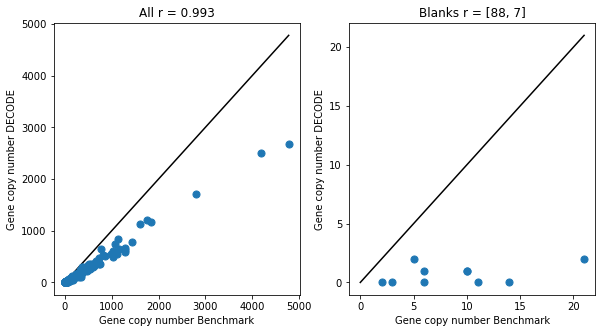

In [791]:
plot_gene_panels(res_df1.nsmallest(36405, 'comb_sig'), bench_47, targets)

36464 36500


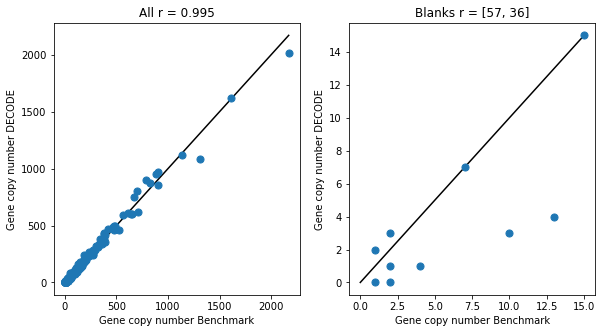

In [497]:
plot_gene_panels(istd_151.nlargest(36500, 'quality'), bench_151, targets)

In [503]:
len(targets)

252

In [997]:
fns = res_df2.loc[~res_df2['loc_idx'].isin(matches['loc_idx_tar'])]
tps = res_df2.loc[res_df2['loc_idx'].isin(matches['loc_idx_tar'])]
fps = res_df.loc[~res_df['loc_idx'].isin(matches['loc_idx_pred'])]
print(tps['gene'].str.contains('Blank').sum()/len(tps)*100)
print(fns['gene'].str.contains('Blank').sum()/len(fns)*100)
print(fps['gene'].str.contains('Blank').sum()/len(fps)*100)

0.233849751534639
0.3033268101761253
0.22388059701492538


In [1030]:
fns = istd_151.loc[~istd_151['loc_idx'].isin(matches['loc_idx_tar'])]
tps = istd_151.loc[istd_151['loc_idx'].isin(matches['loc_idx_tar'])]
fps = res_df.loc[~res_df['loc_idx'].isin(matches['loc_idx_pred'])]
print(tps['gene'].str.contains('Blank').sum()/len(tps)*100)
print(fns['gene'].str.contains('Blank').sum()/len(fns)*100)
print(fps['gene'].str.contains('Blank').sum()/len(fps)*100)

0.11387163561076605
2.4536775421586414
1.5951352780470611


In [705]:
gene_counts = DF(data=None, index=targets)
gene_counts['dec'] = res_sub_s.groupby('gene')['gene'].count()
gene_counts['ist'] = bench_df.groupby('gene')['gene'].count()
gene_counts['tps'] = tps.groupby('gene')['gene'].count()
gene_counts['fps'] = fps.groupby('gene')['gene'].count()
gene_counts['fns'] = fns.groupby('gene')['gene'].count()
gene_counts = gene_counts.fillna(0)

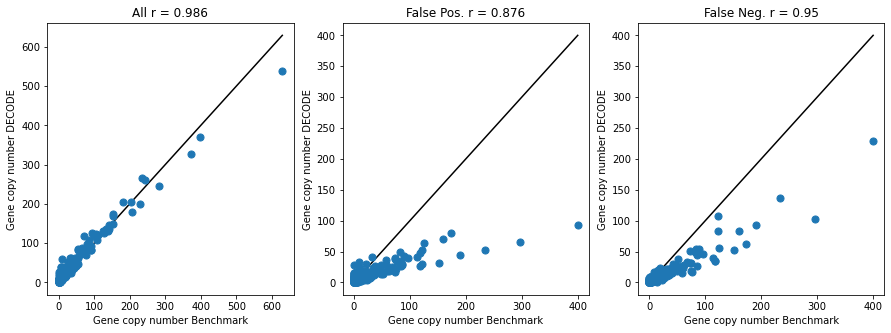

In [706]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plot_gene_numbers(gene_counts['ist'].values, gene_counts['dec'].values, 'All', log=False)
plt.subplot(132)
plot_gene_numbers(gene_counts['tps'].values, gene_counts['fps'].values, 'False Pos.', log=False)
plt.subplot(133)
plot_gene_numbers(gene_counts['tps'].values, gene_counts['fns'].values, 'False Neg.', log=False)

Text(0.5, 1.0, 'Corr. 0.954')

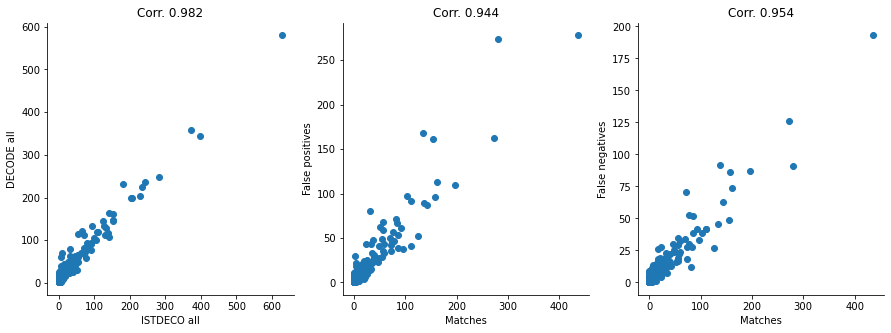

In [676]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.scatter(gene_counts['ist'].values, gene_counts['dec'].values)
plt.plot([0,0],[len(gene_counts['ist'].values),len(gene_counts['dec'].values)])
sns.despine()
plt.xlabel('ISTDECO all')
plt.ylabel('DECODE all')
plt.title('Corr. ' + str(np.corrcoef(gene_counts['ist'].values, gene_counts['dec'].values)[0,1])[:5])
plt.subplot(132)
plt.scatter(gene_counts['tps'].values, gene_counts['fps'].values)
sns.despine()
plt.xlabel('Matches')
plt.ylabel('False positives')
plt.title('Corr. ' + str(np.corrcoef(gene_counts['tps'].values, gene_counts['fps'].values)[0,1])[:5])
plt.subplot(133)
plt.scatter(gene_counts['tps'].values, gene_counts['fns'].values)
sns.despine()
plt.xlabel('Matches')
plt.ylabel('False negatives')
plt.title('Corr. ' + str(np.corrcoef(gene_counts['tps'].values, gene_counts['fns'].values)[0,1])[:5])


In [829]:
par_dict = {}
par_dict['istdeco'] = [istd_151, 'quality', False]
for i,k in enumerate(df_dict['151']):
#     if 'dec_' in k and '151' in k:
    if len(df_dict['151'][k]) > 0:
        tra = sel_int_ch(df_dict['151'][k], codebook)
        par_dict[k] = [tra, 'int_ratio', True]
    #         par_dict[k+'_s'] = [remove_doublets(df_dict[k].nsmallest(50000,'comb_sig')), 'comb_sig', True]

roc_dict = {}
for k in par_dict:
    x, y = make_roc(*par_dict[k], n_max=80000)
    roc_dict[k] = [x, y]

In [830]:
df = pd.DataFrame(columns=roc_dict.keys())
df['x'] = roc_dict[df.keys()[0]][0]
for k in roc_dict.keys():
    df[k] = roc_dict[k][1]

In [831]:
len(bench_150)

28680

In [832]:
fig = px.line(df, x="x", y=list(roc_dict.keys()), range_y=[0,100], range_x=[0,90000], labels={"x": "Number genes","value":'Number blanks'})
fig.show()

Text(0, 0.5, 'N Blanks')

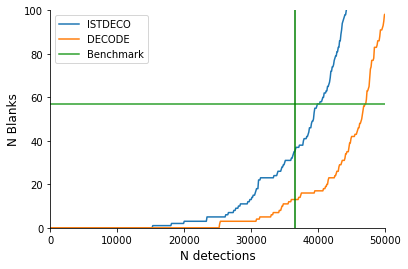

In [837]:
plt.plot(df['x'], df['istdeco'], label='ISTDECO')
plt.plot(df['x'], df['target_mean:True'], label='DECODE')
plt.plot([0,50000], [57,57], label='Benchmark')
plt.plot([36500,36500], [0,100], color='green')
plt.xlim(0,50000)
plt.ylim(0,100)
plt.legend()
sns.despine()

plt.xlabel('N detections', size=12)
plt.ylabel('N Blanks', size=12)

In [972]:
df_dict['47'].keys()

dict_keys(['_num_iters:9995xz_sig_fac:1.0xmodel_init:null', '_norm:nonexl1_reg:0.001', '_num_iters:9995xscale:300xmodel_init:null', '_schedule:nullxfreq:3xnorm:none', '_norm:nonextheta_par:Truexconst_theta_sim:False', '_norm:escortxl1_reg:0.001', '_norm:escortxl1_reg:0.0001', '_num_iters:9995xscale:400xmodel_init:null', '_norm:nonexmean_diff:True', '_schedule:nullxfreq:5xnorm:none', '_norm:none', '_norm:nonexl1_reg:0.0', '_norm:escort', '_schedule:nullxfreq:1xnorm:none', '_norm:escortxl1_reg:0.0', '_norm:nonexl1_reg:0.0001', '_num_iters:9995xphasing:0.15xmodel_init:null'])

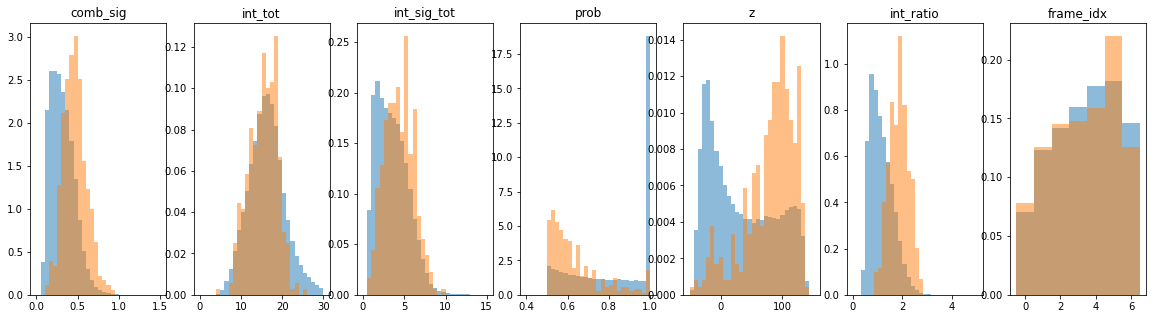

In [82]:
res_df = df_dict['47']['_scale:500']
res_df = sel_int_ch(res_df, codebook)
int_m = [f'int_{i}' for i in range(4)]
int_s = [f'int_sig_{i}' for i in range(4)]
res_df['int_tot'] = res_df.loc[:,int_m].values.sum(-1)
res_df['int_sig_tot'] = res_df.loc[:,int_s].values.sum(-1)


metrics = ['comb_sig','int_tot','int_sig_tot', 'prob','z','int_ratio','frame_idx']
bins = [np.linspace(0,1.5,31), np.linspace(0,30,31), np.linspace(0,15,31), np.linspace(0.4,1,31), np.linspace(-50,150.,31), np.linspace(0,5.,31), np.linspace(-0.5,6.5,8)]
plt.figure(figsize=(20,5))
for i in range(len(metrics)):
    plt.subplot(1,len(metrics),i+1)
    _=plt.hist(res_df[~res_df['gene'].str.contains('Blank')][metrics[i]], density=True, alpha=0.5, bins=bins[i], label='gene matches')
    _=plt.hist(res_df[res_df['gene'].str.contains('Blank')][metrics[i]], density=True, alpha=0.5, bins=bins[i], label='blank matches')
    plt.title(metrics[i])

In [81]:
np.linspace(-0.5,6.5,8)

array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5])

In [74]:
res_df = df_dict['47']['_count_mult:0.01']
# res_df = sel_int_ch(res_df, codebook)
int_m = [f'int_{i}' for i in range(4)]
int_s = [f'int_sig_{i}' for i in range(4)]
res_df['int_tot'] = res_df.loc[:,int_m].values.sum(-1)
res_df['int_sig_tot'] = res_df.loc[:,int_s].values.sum(-1)


metrics = ['comb_sig','int_tot','int_sig_tot', 'prob','z','int_ratio']
bins = [np.linspace(0,1.5,31), np.linspace(0,30,31), np.linspace(0,15,31), np.linspace(0.4,1,31), np.linspace(-50,150.,31), np.linspace(0,2.,31)]
plt.figure(figsize=(20,5))
for i in range(len(metrics)):
    plt.subplot(1,len(metrics),i+1)
    _=plt.hist(res_df[~res_df['gene'].str.contains('Blank')][metrics[i]], density=True, alpha=0.5, bins=bins[i], label='gene matches')
    _=plt.hist(res_df[res_df['gene'].str.contains('Blank')][metrics[i]], density=True, alpha=0.5, bins=bins[i], label='blank matches')
    plt.title(metrics[i])

KeyError: '_count_mult:0.01'

In [1012]:
def corr_scatter(v1, v2, s=0.3):
    plt.scatter(v1, v2, s=s)
    plt.title(np.corrcoef(v1, v2)[0,1])

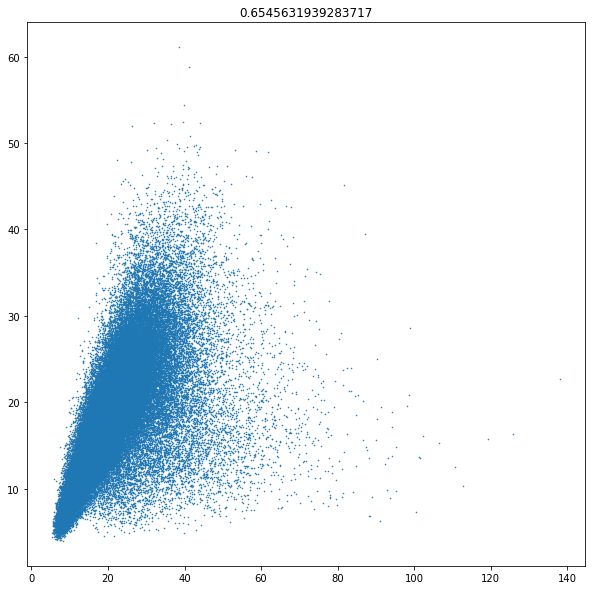

In [1041]:
plt.figure(figsize=(10,10))

corr_scatter(res_df['x_sig'], res_df['z_sig'])

In [299]:
res_df = df_dict['dec_enabled:Truexint_inf:per_channelxchannel_shifts:Truexchannel_facs:Truexn_foci_avg:1xseed:2'].nsmallest(10000, 'comb_sig')

In [290]:
code_cols = [plt.get_cmap('gist_ncar')(x) for x in np.linspace(0.,1.,140)]

In [291]:
import mpld3
from mpld3 import plugins

In [663]:
res_sub = df_dict['dec_psf_noise:0.0xrate_fac:3.0'].nsmallest(17000, 'comb_sig')
# res_sub = df_dict['dec_min_int_sig:0.0xint_fac:0.1'].nsmallest(15000, 'code_err')
ist_sub = istdeco_df.nlargest(15000, 'quality')
bench_sub = bench_df.nlargest(13800, 'total_magnitude')

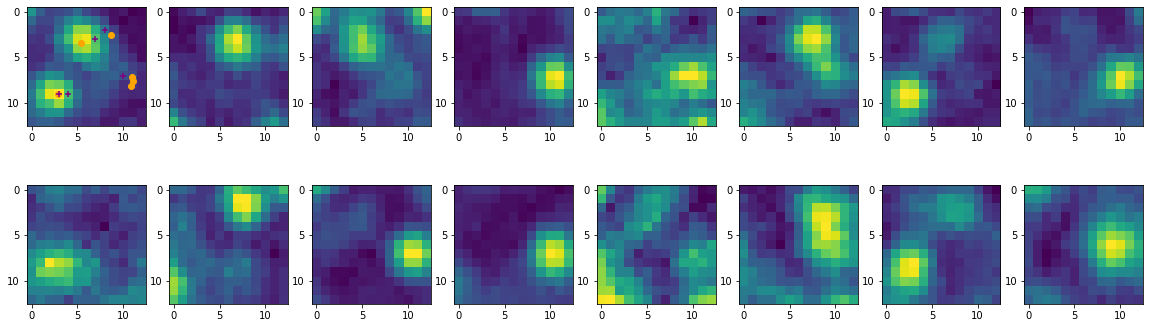

In [664]:
vol, crop = extract_roi(img_stack[None], torch.IntTensor([514,740,0]), 6, 8)

res_crop = crop_df(nm_to_px(res_sub), crop)
ist_crop = crop_df(nm_to_px(ist_sub), crop)

plt.figure(figsize=(20,6))
for i in range(16):
    plt.subplot(2,8,i+1)
    plt.imshow(vol[0,i])
    
    if not i:
        plt.scatter(res_crop['x'],res_crop['y'],color='orange')
        plt.scatter(ist_crop['x'],ist_crop['y'],color='purple', marker='+')

In [80]:
img_stack = read_MOp_tiff(base_path+'/datasets/CodFish/MERFISH/MOp/mouse1_sample1_raw/aligned_images47.tif')[:,:,:,:,:]

In [81]:
img_stack.shape

torch.Size([1, 22, 7, 2048, 2048])

In [82]:
from decode_fish.funcs.dataset import GaussianSmoothing
filt = GaussianSmoothing(11, device='cpu')
img_filt = filt(img_stack)
img_stack -= img_filt

/groups/turaga/home/speisera/anaconda3/envs/decode_fish_dev2/lib/python3.8/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [971]:
df_dict['47'].keys()

dict_keys(['_num_iters:9995xz_sig_fac:1.0xmodel_init:null', '_norm:nonexl1_reg:0.001', '_num_iters:9995xscale:300xmodel_init:null', '_schedule:nullxfreq:3xnorm:none', '_norm:nonextheta_par:Truexconst_theta_sim:False', '_norm:escortxl1_reg:0.001', '_norm:escortxl1_reg:0.0001', '_num_iters:9995xscale:400xmodel_init:null', '_norm:nonexmean_diff:True', '_schedule:nullxfreq:5xnorm:none', '_norm:none', '_norm:nonexl1_reg:0.0', '_norm:escort', '_schedule:nullxfreq:1xnorm:none', '_norm:escortxl1_reg:0.0', '_norm:nonexl1_reg:0.0001', '_num_iters:9995xphasing:0.15xmodel_init:null'])

In [1116]:
res_df = df_dict['47']['_norm:nonexmean_diff:True'].nsmallest(40000, 'score')
ints = res_df[[f'int_{i}' for i in range(22)]].values
ints[code_ref[res_df['code_inds'].values]==0] = 0.

In [1117]:
def extract_roi(beads: torch.Tensor, coordinates, size_xy=5):
    res = []
    
    x, y, z = coordinates
    crop = np.s_[:,z, int(y-size_xy): int(y+size_xy+1), int(x-size_xy): int(x+size_xy+1)]
    single_bead = beads[crop]
        
    return single_bead, crop

In [1118]:
z_vols = [[] for _ in range(20)]

In [1119]:
int_keys = [f'int_{i}' for i in range(22)]

In [1120]:
for i in tqdm(range(len(res_df))):
    b_loc = nm_to_px(res_df.iloc[i])
    vol, crop = extract_roi(img_stack[0], torch.IntTensor(np.array(b_loc.loc[['x','y','frame_idx']].values, dtype='float32')), 6)
    if vol.shape == torch.Size([22, 13, 13]):
        ints = b_loc[int_keys].values.astype('float32')
        volm = vol/ints[:,None,None]
        volm = cpu(volm[code_ref[b_loc['code_inds']].nonzero()[0]])
        z = (100*b_loc['z'] + 50)/2
        z_vols[int(z/5)].append(volm)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40000/40000 [01:26<00:00, 463.36it/s]


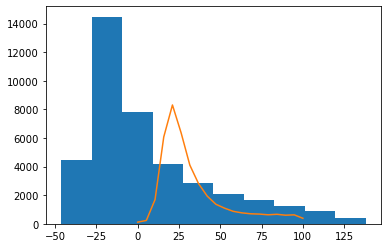

In [1068]:
plt.hist(res_df['z'], bins=np.linspace(0,100,20))
plt.plot(np.linspace(0,100,20), [len(z) for z in z_volspn])

In [1092]:
def get_psf_vol(stack):
    psf_vol = []
    for i in range(len(stack)):
        if len(stack[i]):
            mvol = np.concatenate(stack[i])
            mvol = mvol.reshape(-1, mvol.shape[-2], mvol.shape[-1])
            psf_vol.append(mvol.mean(0))
    return np.stack(psf_vol)

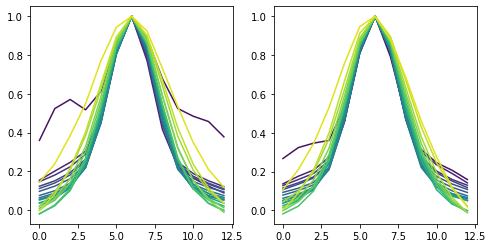

In [1114]:
import seaborn as sns
cpal = sns.color_palette("viridis", n_colors=20)
plt.figure(figsize=(8,4))
plt.subplot(121)
for i in range(len(pltvol)):
    plt.plot(pltvol[i][6, :]/pltvol[i][6, :].max(), color=cpal[i])
plt.subplot(122)
for i in range(len(pltvol)):
    plt.plot(pltvol[i][:, 6]/pltvol[i][:, 6].max(), color=cpal[i])

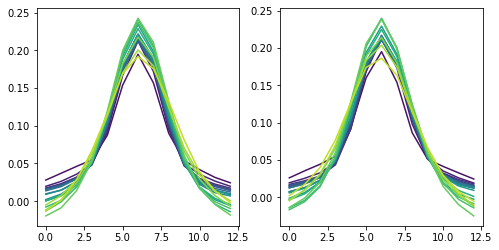

In [1126]:
import seaborn as sns
cpal = sns.color_palette("viridis", n_colors=20)
plt.figure(figsize=(8,4))
plt.subplot(121)
for i in range(len(pltvol)):
    plt.plot(pltvol[i][6, :]/pltvol[i][6, :].sum(), color=cpal[i])
plt.subplot(122)
for i in range(len(pltvol)):
    plt.plot(pltvol[i][:, 6]/pltvol[i][:, 6].sum(), color=cpal[i])

(<Figure size 1106.58x1063.38 with 6 Axes>,
 [<AxesSubplot:ylabel='y'>,
  <AxesSubplot:xlabel='x', ylabel='z'>,
  <AxesSubplot:xlabel='z'>])

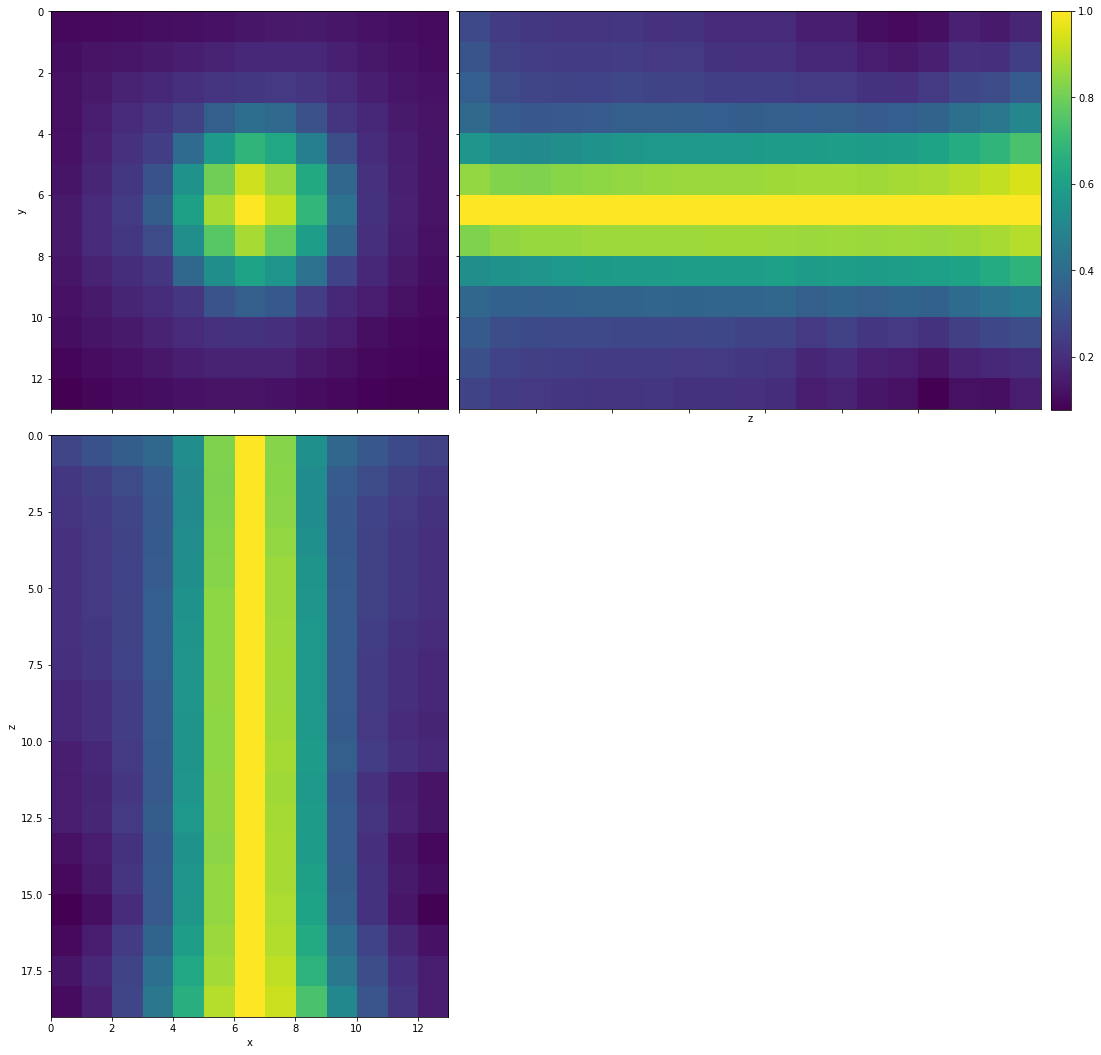

In [1121]:
pltvol = get_psf_vol(z_vols)
# plot_3d_projections(pltvol/pltvol.max(-1).max(-1)[...,None,None])

21392


(600.0, 750.0)

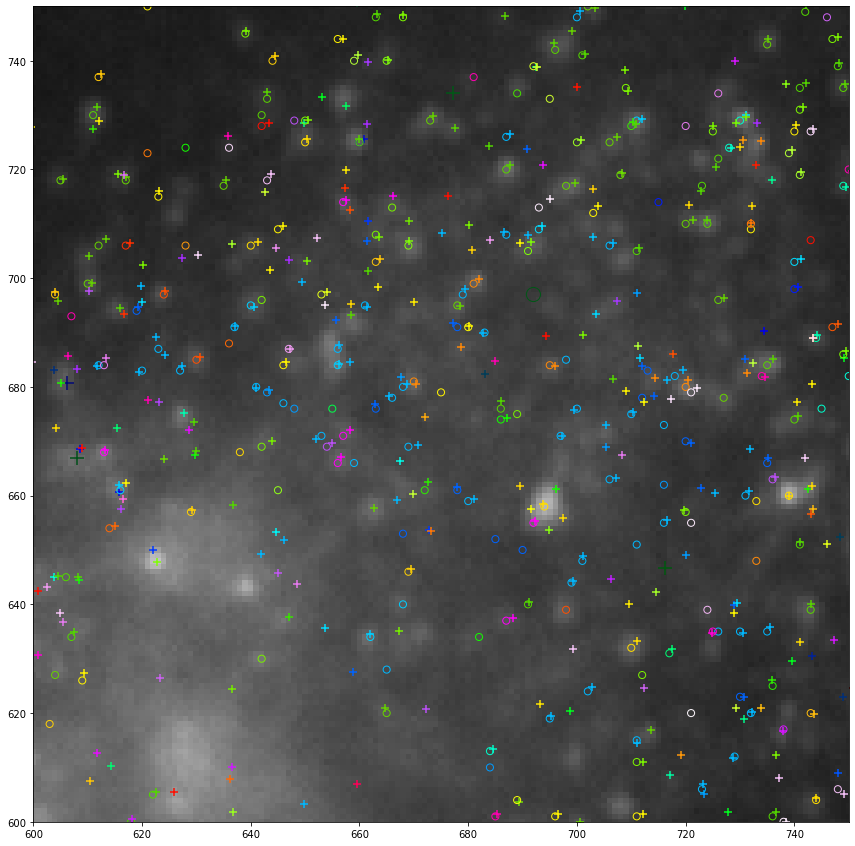

In [63]:
ind = 0
img = load_tiff_image(image_paths[ind])
preds_px = nm_to_px(res_single)#[res_df['gene']!='MALAT1']
bench_px = nm_to_px(ist_sub)#[bench_df['gene']!='MALAT1']
print(len(preds_px))
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(img[0,0], cmap='gray')

for i in range(len(targets)):
    
    preds_sub = preds_px[preds_px['code_inds'] == i]
    bench_sub = bench_px[bench_px['code_inds'] == i]
    
    size = 200. if 'Blank' in targets[i] else 50.

    ax.scatter(bench_sub['x'],bench_sub['y'], color=code_cols[i], s=size, marker='o', facecolor='none')
    ax.scatter(preds_sub['x'],preds_sub['y'], color=code_cols[i], s=size, marker='+')

ax.set_xlim(600,750)
ax.set_ylim(600,750)

# plugins.connect(fig, plugins.MousePosition(fontsize=14))
# mpld3.display()

In [409]:
def extract_roi(beads: torch.Tensor, coordinates, size_xy=5, size_z=10):
    res = []
    
    x, y, z = coordinates
    crop = np.s_[:,int(z):int(z+1), int(y-size_xy): int(y+size_xy+1), int(x-size_xy): int(x+size_xy+1)]
    single_bead = beads[crop]
        
    return single_bead, crop

# Analyze blanks

26


loc_idx frame_idx code_inds          x         y         z      prob  \
28421   28421         0       243  383.26723  68.88303  2.376363  0.658758   

           x_sig      y_sig     z_sig  ...     int_1     int_2     int_3  \
28421  17.744606  23.340118  8.481233  ...  5.209935  6.694495  8.023641   

      int_sig_0 int_sig_1 int_sig_2 int_sig_3        zm    int_tot int_sig_tot  
28421  1.996939  1.568243  3.390814  3.319344  37.63626  26.435554   10.275341  

[1 rows x 23 columns]

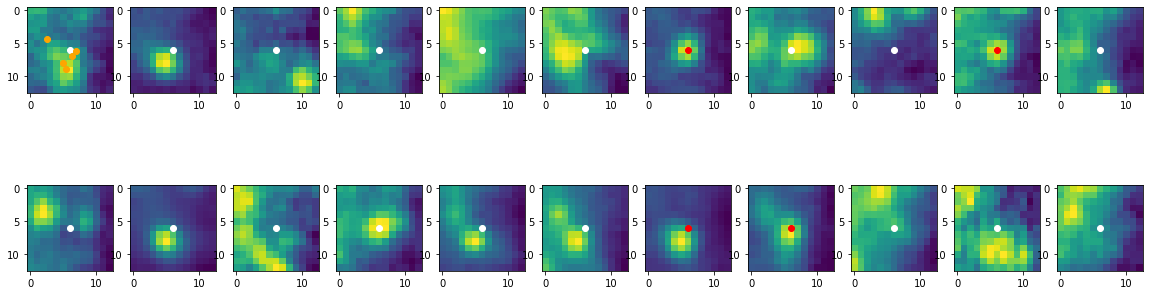

In [422]:
# Random predictions 
res_sub = res_df.nsmallest(20000, 'comb_sig')
# Random blank 
sub = res_sub[res_sub['gene'].str.contains('Blank')]

ind = np.random.randint(0, len(sub))
print(ind)

b_loc = nm_to_px(sub.iloc[ind])
display(DF(b_loc).T)
vol, crop = extract_roi(img_stack, torch.IntTensor(np.array(b_loc.loc[['x','y','z']].values, dtype='float32')), 6, 8)

res_crop = crop_df(nm_to_px(res_sub), crop)
bench_crop = crop_df(nm_to_px(bench_df), crop)

plt.figure(figsize=(20,6))
for i in range(22):
    plt.subplot(2,11,i+1)
    plt.imshow(vol[i,0])
    color = 'red' if code_ref[list(targets).index(b_loc['gene'])][i] else 'white'
    plt.scatter([6],[6], color=color)
    
#     plt.title(str(np.round(b_loc[f'int_{i}'], 3)) + ' +- ' + str(np.round(b_loc[f'int_sig_{i}'], 3)))
    
    if not i:
        plt.scatter(res_crop['x'],res_crop['y'],color='orange')
        plt.scatter(bench_crop['x'],bench_crop['y'],color='purple', marker='+')

In [677]:
fn_inds = fns['loc_idx'].values

In [678]:
len(res_df)

15020

In [679]:
res_sub = res_df.nsmallest(10000, 'comb_sig')

loc_idx          x           y         z   gene frame_idx code_inds
5894569  5894569  90.023502  729.022581  2.304147  Pdgfc         0       152

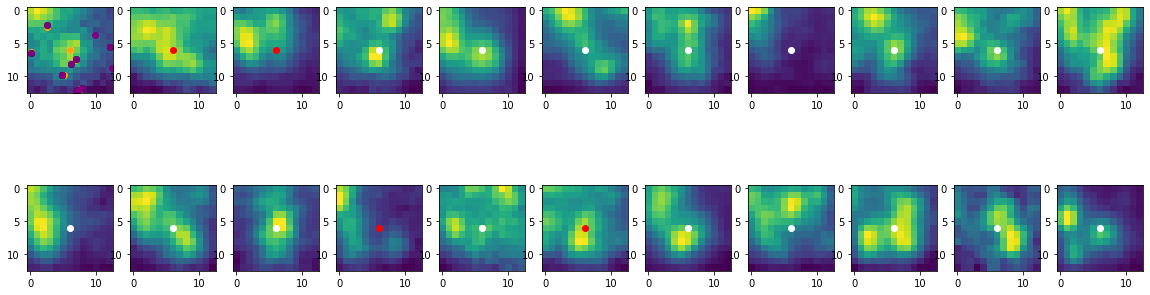

In [681]:
ind = np.random.randint(0, len(fn_inds))
ind = fn_inds[ind]

b_loc = nm_to_px(bench_df[bench_df['loc_idx'] == ind], px_size_zyx=[120.0, 100.0, 100.0]).iloc[0]

display(DF(b_loc).T)
vol, crop = extract_roi(img_stack, torch.IntTensor(np.array(b_loc.loc[['x','y','z']].values, dtype='float32')), 6, 8)

cropb = crop_df(nm_to_px(bench_df, px_size_zyx=[120.0, 100.0, 100.0]), crop)
cropr = crop_df(nm_to_px(res_sub), crop)
cropf = crop_df(nm_to_px(res_df), crop)

plt.figure(figsize=(20,6))
for i in range(22):
    plt.subplot(2,11,i+1)
    plt.imshow(vol[i,0])
    color = 'red' if code_ref[list(targets).index(b_loc['gene'])][i] else 'white'
    plt.scatter([6],[6], color=color)
    
    if not i:
        plt.scatter(cropb['x'],cropb['y'],color='orange')
        plt.scatter(cropr['x'],cropr['y'],color='black')
        plt.scatter(cropf['x'],cropf['y'],color='purple')

In [545]:
cropb

loc_idx         x         y         z   gene  frame_idx  code_inds
5911774  5911774  6.497235  6.030876  0.760369  Olfm3          0        144

In [382]:
res_df = remove_doublets(df_dict['dec_num_iters:100000xenabled:False'])

In [383]:
keys = ['x_sig','y_sig','z_sig','prob','int_0', 'int_1', 'int_2', 'int_3', 'int_sig_0', 'int_sig_1', 'int_sig_2', 'int_sig_3', 'zm']
res_df['class'] = res_df['gene'].str.contains('Blank')*1

/groups/turaga/home/speisera/anaconda3/envs/decode_fish_dev2/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [384]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

X = np.concatenate([res_df.nsmallest(10000,'comb_sig')[keys].values, res_df[res_df['class'] == 1][keys].values])
y = np.concatenate([res_df.nsmallest(10000,'comb_sig')['class'].values, res_df[res_df['class'] == 1]['class'].values])
 
clf = LogisticRegression(random_state=0,max_iter=10000).fit(X, y)

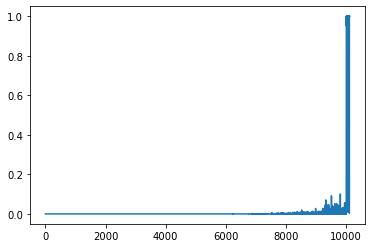

In [385]:
plt.plot(clf.predict_proba(X)[:,1])

In [386]:
# res_df = remove_doublets(df_dict['dec_num_iters:100000xenabled:False'])
res_df = remove_doublets(df_dict['dec_start_mic:30000xpsf_vol:Truextheta_par:Truexlr:0.0004'])
X = res_df[keys]

In [387]:
res_df['score'] = clf.predict_proba(X)[:,1]

/groups/turaga/home/speisera/anaconda3/envs/decode_fish_dev2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



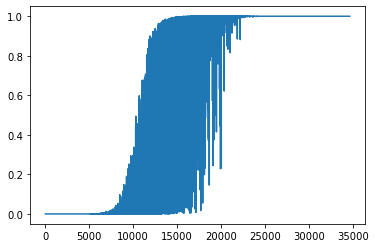

In [388]:
plt.plot(res_df.nsmallest(50000, 'comb_sig')['score'].values)

In [61]:
df_dict['47'].keys()

dict_keys(['_scale:500', '_scale:800', '_scale:700', '_scale:600'])

In [66]:
res_df1 = df_dict['47']['_scale:500']
res_df2 = df_dict['151']['_scale:500']

res_df1 = sel_int_ch(res_df1, codebook)
res_df2 = sel_int_ch(res_df2, codebook)

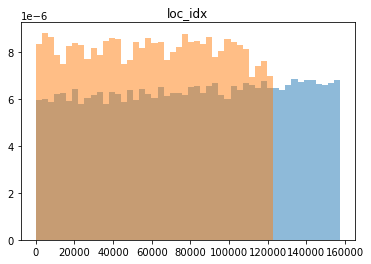

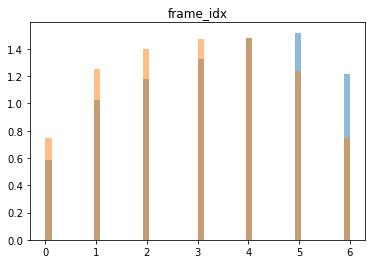

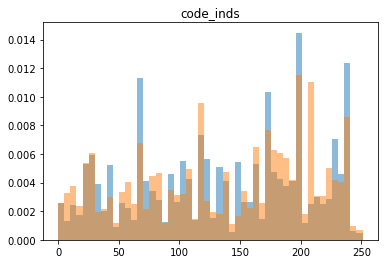

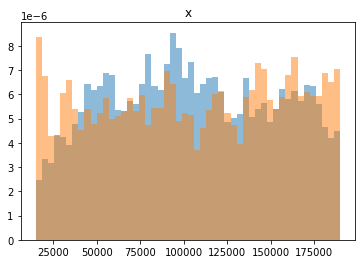

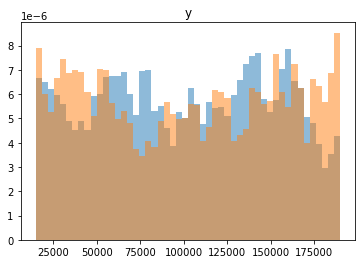

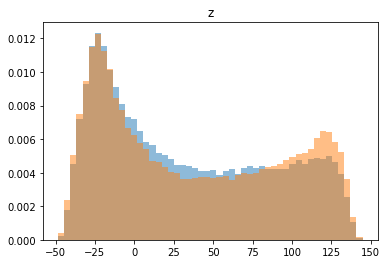

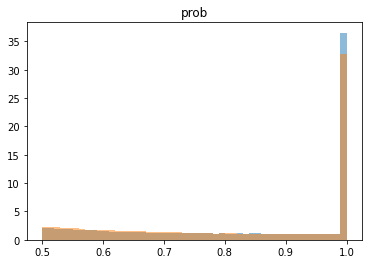

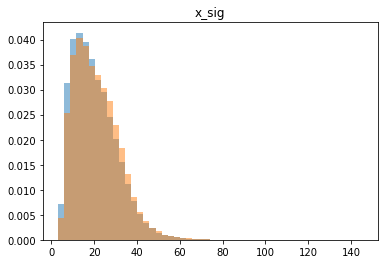

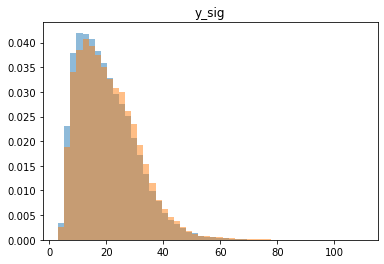

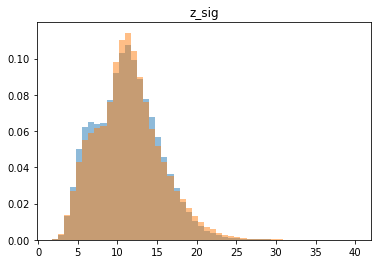

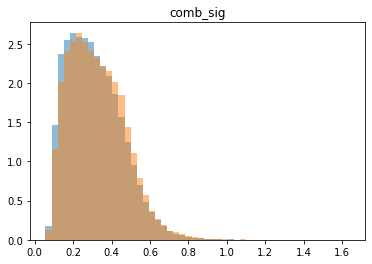

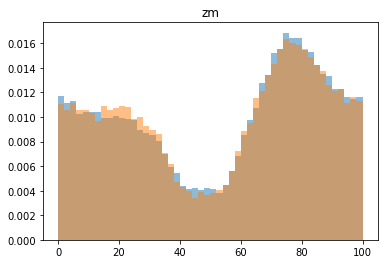

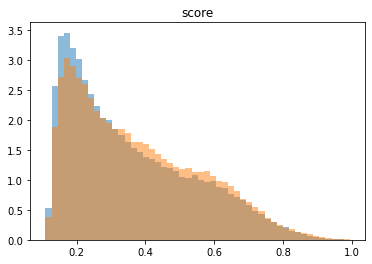

<__array_function__ internals>:5: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



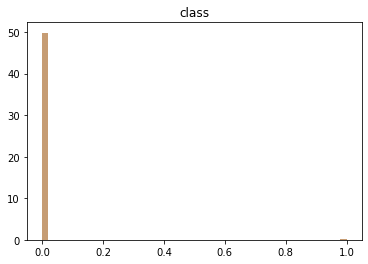

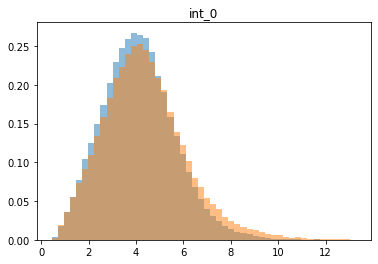

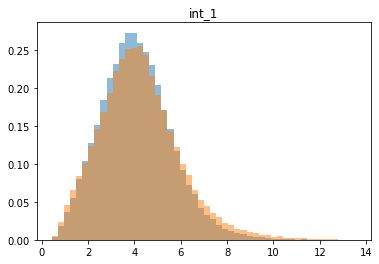

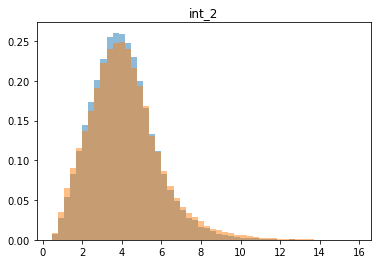

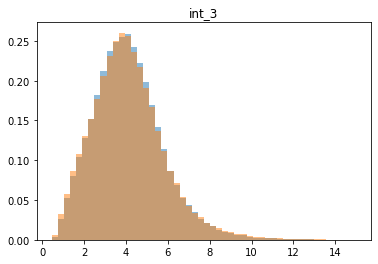

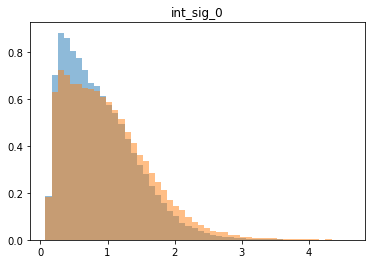

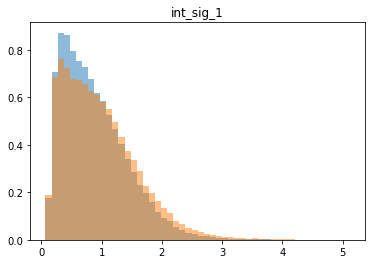

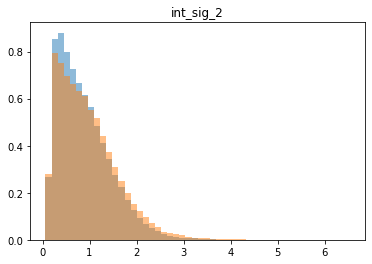

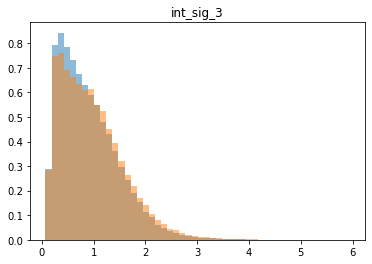

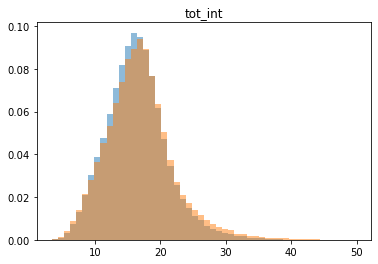

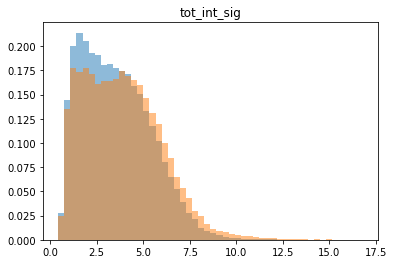

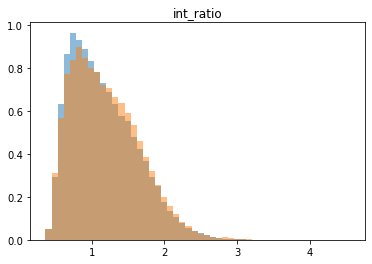

In [72]:
for k in res_df1.keys():
    if 'gene' not in k:
# for k in ['x_sig', 'y_sig', 'z', 'z_sig']:
        bins = np.linspace(res_df1[k].min(), res_df1[k].max(), 51)
        plt.hist(res_df1[k], alpha=0.5, bins=bins, density=True)
        plt.hist(res_df2[k], alpha=0.5, bins=bins, density=True)
        plt.title(k)
        plt.show()

In [770]:
omega_df

150                     151                      47  \
          target_mean:True  bench target_mean:True  bench target_mean:True   
N                    51624  28680            62173  36480            99688   
N_blanks               436     45              454     57              579   
NN_blanks         0.333333    1.0          0.22807    1.0             0.25   
int_sig            0.20838    NaN         0.161087    NaN         0.202594   

                  
           bench  
N          64252  
N_blanks      88  
NN_blanks    1.0  
int_sig      NaN

In [804]:
decode_ratios = 0.33, 0.23, 0.25
istdeco_ratios = 0.64

In [812]:
decode_ns = 47000/36500, 36500/28700, 76/64
istdeco_ns= 400/365

Text(0.5, 1.0, 'N pred / N pred (benchmark) \n for N blank (benchmark)')

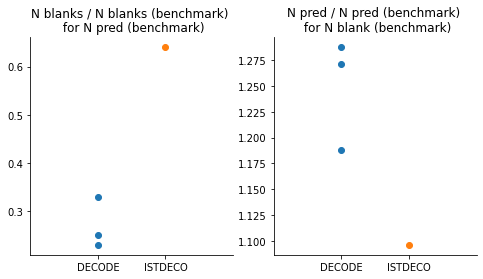

In [823]:
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.scatter(np.ones_like(decode_ratios), decode_ratios)
plt.scatter(np.ones_like(istdeco_ratios)*2, istdeco_ratios)
sns.despine()
plt.xticks([1,2],['DECODE','ISTDECO'])
plt.xlim(0,3)
plt.title('N blanks / N blanks (benchmark) \n for N pred (benchmark)')

plt.subplot(122)
plt.scatter(np.ones_like(decode_ns), decode_ns)
plt.scatter(np.ones_like(istdeco_ns)*2, istdeco_ns)
sns.despine()
plt.xticks([1,2],['DECODE','ISTDECO'])
plt.xlim(0,3)
plt.title('N pred / N pred (benchmark) \n for N blank (benchmark)')